# Demo MAGxLR_1B (magnetic field 1Hz)

> Authors: Ashley Smith
>
> Abstract: Access to the low rate (1Hz) magnetic data (level 1b product), together with geomagnetic model evaluations (level 2 products).

In [1]:
# %load_ext watermark
# %watermark -i -v -p viresclient,pandas,xarray,matplotlib

In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()

## MAGX_LR_1B product information

This is one of the main products from Swarm - the 1Hz measurements of the magnetic field vector (`B_NEC`) and total intensity (`F`). These are derived from the Vector Field Magnetometer (VFM) and Absolute Scalar Magnetomer (ASM).

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_LR_1B_Product

Measurements are available through VirES as part of collections with names containing `MAGx_LR`, for each Swarm spacecraft:

In [3]:
# request.available_collections("MAG", details=False)

The measurements can be used together with geomagnetic model evaluations as shall be shown below.

### Check what "MAG" data variables are available

In [4]:
request.available_measurements("MAG")

['F',
 'dF_AOCS',
 'dF_other',
 'F_error',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_F',
 'Flags_B',
 'Flags_q',
 'Flags_Platform',
 'ASM_Freq_Dev']

### Check the names of available models

In [5]:
request.available_models(details=False)

['IGRF',
 'IGRF12',
 'LCS-1',
 'MF7',
 'CHAOS-Core',
 'CHAOS-Static',
 'CHAOS-MMA-Primary',
 'CHAOS-MMA-Secondary',
 'CHAOS-6-Core',
 'CHAOS-6-Static',
 'CHAOS-6-MMA-Primary',
 'CHAOS-6-MMA-Secondary',
 'MCO_SHA_2C',
 'MCO_SHA_2D',
 'MLI_SHA_2C',
 'MLI_SHA_2D',
 'MMA_SHA_2C-Primary',
 'MMA_SHA_2C-Secondary',
 'MMA_SHA_2F-Primary',
 'MMA_SHA_2F-Secondary',
 'MIO_SHA_2C-Primary',
 'MIO_SHA_2C-Secondary',
 'MIO_SHA_2D-Primary',
 'MIO_SHA_2D-Secondary']

## Fetch one hour of MAG data and models, at 10-second sampling

In [6]:
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    sampling_step="PT10S"
)
data = request.get_between(
    # 2014-01-01 00:00:00
    start_time = dt.datetime(2014,1,1, 0),
    # 2014-01-01 01:00:00
    end_time = dt.datetime(2014,1,1, 1)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.098MB)


### See a list of the input files

In [7]:
data.sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20200419T235959_0701']

### Transfer data to a pandas dataframe:

In [8]:
df = data.as_dataframe()
df.head()

,Latitude,B_NEC,Longitude,Radius,F,Spacecraft,F_CHAOS-Core,B_NEC_MCO_SHA_2D,F_MCO_SHA_2D,B_NEC_CHAOS-Core
2014-01-01 00:00:00,-1.228938,"[20103.5246, -4126.2621, -10086.988800000001]",-14.116674,6878309.22,22867.5503,A,22874.711476,"[20113.62392147383, -4127.463956127047, -10081...",22874.211509,"[20113.291277850683, -4127.342823794888, -1008..."
2014-01-01 00:00:10,-1.862521,"[19815.0914, -4160.9933, -10514.4074]",-14.131424,6878381.17,22814.5656,A,22821.436999,"[19825.16184358055, -4163.127549318375, -10508...",22820.941425,"[19824.78220795439, -4162.975717923168, -10510..."
2014-01-01 00:00:20,-2.496090,"[19523.4946, -4195.196800000001, -10926.966400...",-14.146155,6878452.05,22763.2585,A,22769.855645,"[19533.553905492434, -4197.529053749354, -1092...",22769.369161,"[19533.12538504962, -4197.345939520524, -10922..."
2014-01-01 00:00:30,-3.129644,"[19229.2386, -4228.4747, -11324.8335]",-14.160861,6878521.87,22713.3703,A,22719.711293,"[19239.343572344795, -4230.60181901415, -11318...",22719.238240,"[19238.86516786588, -4230.38692118606, -11320...."
2014-01-01 00:00:40,-3.763184,"[18932.8807, -4260.8424, -11708.0897]",-14.175534,6878590.61,22664.7202,A,22670.760431,"[18943.075143502585, -4262.280633762369, -1170...",22670.304681,"[18942.54680495338, -4262.03355160655, -11703...."


Use `expand=True` to extract vectors (B_NEC...) as separate columns (..._N, ..._E, ..._C)

In [9]:
df = data.as_dataframe(expand=True)
df.head()

,Latitude,Longitude,Radius,F,Spacecraft,F_CHAOS-Core,F_MCO_SHA_2D,B_NEC_CHAOS-Core_N,B_NEC_CHAOS-Core_E,B_NEC_CHAOS-Core_C,B_NEC_N,B_NEC_E,B_NEC_C,B_NEC_MCO_SHA_2D_N,B_NEC_MCO_SHA_2D_E,B_NEC_MCO_SHA_2D_C
2014-01-01 00:00:00,-1.228938,-14.116674,6878309.22,22867.5503,A,22874.711476,22874.211509,20113.291278,-4127.342824,-10083.302053,20103.5246,-4126.2621,-10086.9888,20113.623921,-4127.463956,-10081.454567
2014-01-01 00:00:10,-1.862521,-14.131424,6878381.17,22814.5656,A,22821.436999,22820.941425,19824.782208,-4162.975718,-10510.263092,19815.0914,-4160.9933,-10514.4074,19825.161844,-4163.127549,-10508.410652
2014-01-01 00:00:20,-2.496090,-14.146155,6878452.05,22763.2585,A,22769.855645,22769.369161,19533.125385,-4197.345940,-10922.711471,19523.4946,-4195.1968,-10926.9664,19533.553905,-4197.529054,-10920.860481
2014-01-01 00:00:30,-3.129644,-14.160861,6878521.87,22713.3703,A,22719.711293,22719.238240,19238.865168,-4230.386921,-11320.564244,19229.2386,-4228.4747,-11324.8335,19239.343572,-4230.601819,-11318.721366
2014-01-01 00:00:40,-3.763184,-14.175534,6878590.61,22664.7202,A,22670.760431,22670.304681,18942.546805,-4262.033552,-11703.775846,18932.8807,-4260.8424,-11708.0897,18943.075144,-4262.280634,-11701.947796


### ... or to an xarray Dataset:

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:           (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp         (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC               (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft        (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude          (Timestamp) float64 -1.229 -1.863 -2.496 ... 48.14 48.77
    B_NEC             (Timestamp, NEC) float64 2.01e+04 -4.126e+03 ... 3.558e+04
    Longitude         (Timestamp) float64 -14.12 -14.13 -14.15 ... 153.6 153.6
    Radius            (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    F                 (Timestamp) float64 2.287e+04 2.281e+04 ... 4.021e+04
    F_CHAOS-Core      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.02e+04
    B_NEC_MCO_SHA_2D  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
    F_MCO_SHA_2D      (Timestamp) float64 2.287e+04 2.282e+04 ... 4.021e+04
    B_NEC_CHAOS-Core  (Timestamp, NEC) float64 2.011e+04 ... 3.557e+04
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    RangeFilters:    []

In [11]:
ds.Sources

['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_0505_MDR_MAG_LR',
 'SW_OPER_MCO_SHA_2D_20131126T000000_20180101T000000_0401',
 'SW_OPER_MCO_SHA_2X_19970101T000000_20200419T235959_0701']

### Instead, fetch the residuals directly

Adding `residuals=True` to `.set_products()` will instead directly evaluate and return all data-model residuals

In [12]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core", "MCO_SHA_2D"],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.081MB)


,Latitude,Longitude,Radius,Spacecraft,F_res_CHAOS-Core,F_res_MCO_SHA_2D,B_NEC_res_CHAOS-Core_N,B_NEC_res_CHAOS-Core_E,B_NEC_res_CHAOS-Core_C,B_NEC_res_MCO_SHA_2D_N,B_NEC_res_MCO_SHA_2D_E,B_NEC_res_MCO_SHA_2D_C
2014-01-01 00:00:00,-1.228938,-14.116674,6878309.22,A,-7.161176,-6.661209,-9.766678,1.080724,-3.686747,-10.099321,1.201856,-5.534233
2014-01-01 00:00:10,-1.862521,-14.131424,6878381.17,A,-6.871399,-6.375825,-9.690808,1.982418,-4.144308,-10.070444,2.134249,-5.996748
2014-01-01 00:00:20,-2.496090,-14.146155,6878452.05,A,-6.597145,-6.110661,-9.630785,2.149140,-4.254929,-10.059305,2.332254,-6.105919
2014-01-01 00:00:30,-3.129644,-14.160861,6878521.87,A,-6.340993,-5.867940,-9.626568,1.912221,-4.269256,-10.104972,2.127119,-6.112134
2014-01-01 00:00:40,-3.763184,-14.175534,6878590.61,A,-6.040231,-5.584481,-9.666105,1.191152,-4.313854,-10.194444,1.438234,-6.141904


## Plot the scalar residuals for each model

### ... using the pandas method:

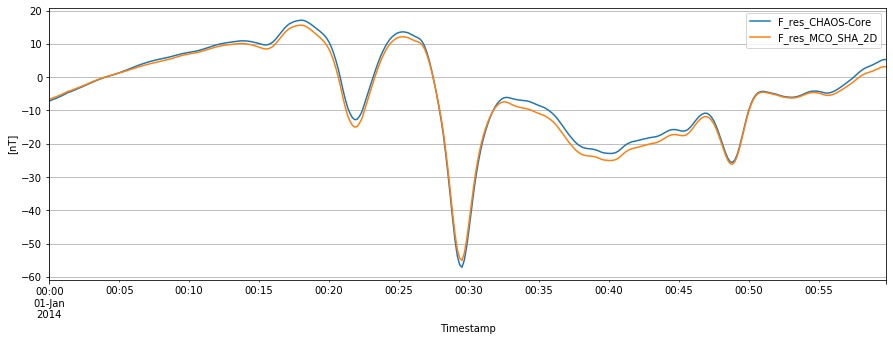

In [13]:
ax = df.plot(
    y=["F_res_CHAOS-Core", "F_res_MCO_SHA_2D"],
    figsize=(15,5),
    grid=True
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]");

### ... using matplotlib interface (Matlab-style)

NB: we are doing `plt.plot(x, y)` with `x` as `df.index` (the time-based index of df), and `y` as `df[".."]`

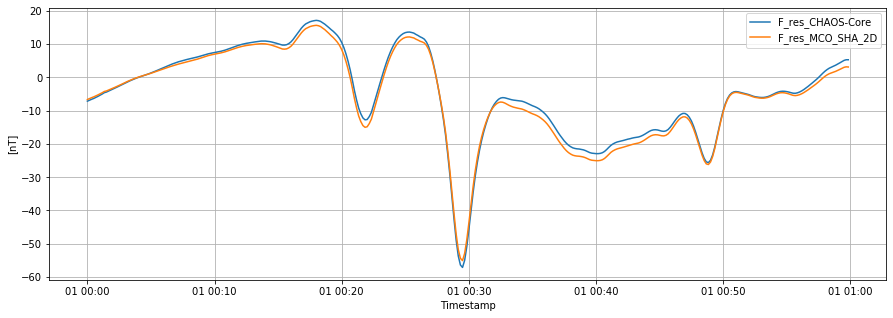

In [14]:
plt.figure(figsize=(15,5))
plt.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
plt.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
plt.xlabel("Timestamp")
plt.ylabel("[nT]")
plt.grid()
plt.legend();

### ... using matplotlib interface (Object Oriented style)

This is the recommended route for making more complicated figures

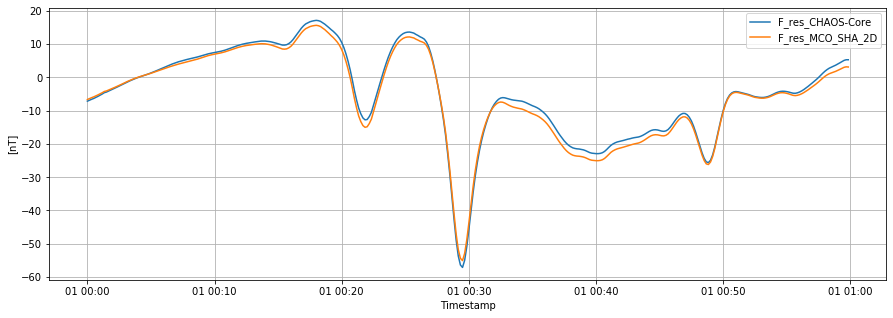

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(
    df.index,
    df["F_res_CHAOS-Core"],
    label="F_res_CHAOS-Core"
)
ax.plot(
    df.index,
    df["F_res_MCO_SHA_2D"],
    label="F_res_MCO_SHA_2D"
)
ax.set_xlabel("Timestamp")
ax.set_ylabel("[nT]")
ax.grid()
ax.legend();

## Plot the vector components

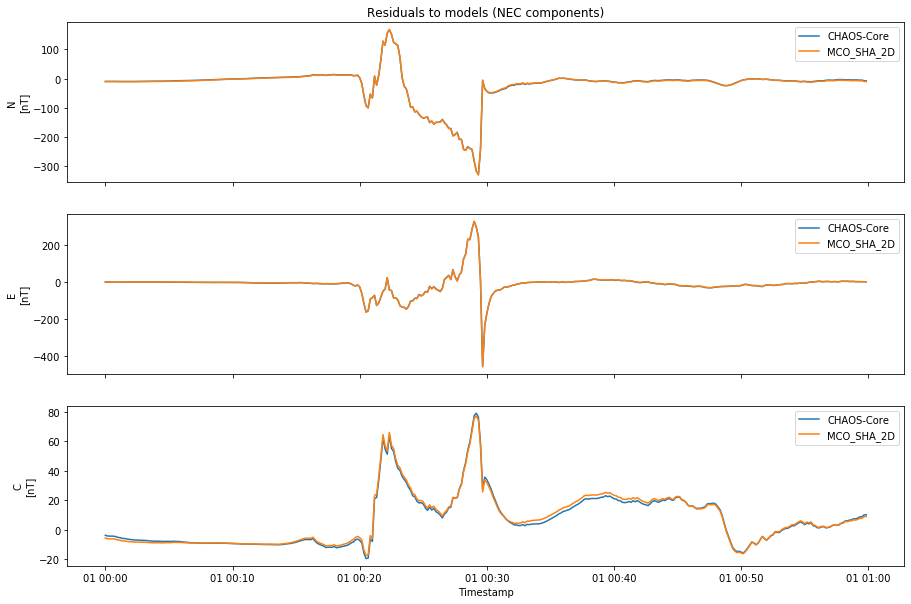

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for component, ax in zip("NEC", axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            df.index,
            df[f"B_NEC_res_{model_name}_{component}"],
            label=model_name
        )
    ax.set_ylabel(f"{component}\n[nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");

## Similar plotting, using the data via xarray instead

xarray provides a more sophisticated data structure that is more suitable for the complex vector data we are accessing, together with nice stuff like unit and other metadata support. Unfortunately due to the extra complexity, this can make it difficult to use right away.

In [17]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:               (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.767 1.081 ... 2.921 10.2
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    F_res_CHAOS-Core      (Timestamp) float64 -7.161 -6.871 ... 5.281 5.283
    F_res_MCO_SHA_2D      (Timestamp) float64 -6.661 -6.376 ... 3.153 3.108
    B_NEC_res_MCO_SHA_2D  (Timestamp, NEC) float64 -10.1 1.202 ... 2.782 8.984
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"...
    RangeFilters:    []

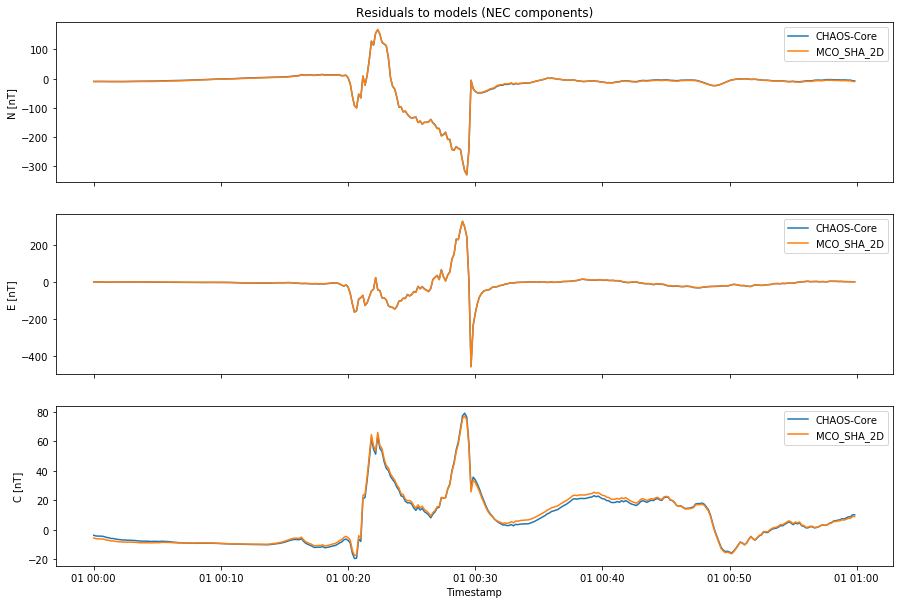

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10), sharex=True)
for i, ax in enumerate(axes):
    for model_name in ("CHAOS-Core", "MCO_SHA_2D"):
        ax.plot(
            ds["Timestamp"],
            ds[f"B_NEC_res_{model_name}"][:, i],
            label=model_name
        )
    ax.set_ylabel("NEC"[i] + " [nT]")
    ax.legend()
axes[0].set_title("Residuals to models (NEC components)")
axes[2].set_xlabel("Timestamp");
# automatic unit labels will be possible in v0.5.0

Note that xarray also allows convenient direct plotting like:

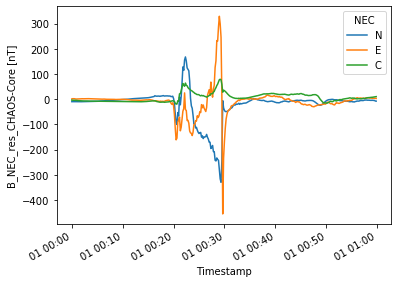

In [19]:
ds["B_NEC_res_CHAOS-Core"].plot.line(x="Timestamp");

## Access multiple MAG datasets simultaneously

It is possible to fetch data from multiple collections simultaneously. Here we fetch the measurements from Swarm Alpha and Bravo. In the returned data, you can differentiate between them using the "Spacecraft" column.

In [20]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_LR_1B", "SW_OPER_MAGC_LR_1B")
request.set_products(
    measurements=["F", "B_NEC"],
    models=["CHAOS-Core",],
    residuals=True,
    sampling_step="PT10S"
)
data = request.get_between(
    start_time = dt.datetime(2014,1,1, 0),
    end_time = dt.datetime(2014,1,1, 1)
)
df = data.as_dataframe(expand=True)
df.head()

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (0.072MB)


,Latitude,Longitude,Radius,Spacecraft,F_res_CHAOS-Core,B_NEC_res_CHAOS-Core_N,B_NEC_res_CHAOS-Core_E,B_NEC_res_CHAOS-Core_C
2014-01-01 00:00:00,-1.228938,-14.116674,6878309.22,A,-7.161176,-9.766678,1.080724,-3.686747
2014-01-01 00:00:10,-1.862521,-14.131424,6878381.17,A,-6.871399,-9.690808,1.982418,-4.144308
2014-01-01 00:00:20,-2.496090,-14.146155,6878452.05,A,-6.597145,-9.630785,2.149140,-4.254929
2014-01-01 00:00:30,-3.129644,-14.160861,6878521.87,A,-6.340993,-9.626568,1.912221,-4.269256
2014-01-01 00:00:40,-3.763184,-14.175534,6878590.61,A,-6.040231,-9.666105,1.191152,-4.313854


In [21]:
df[df["Spacecraft"] == "A"].head()

,Latitude,Longitude,Radius,Spacecraft,F_res_CHAOS-Core,B_NEC_res_CHAOS-Core_N,B_NEC_res_CHAOS-Core_E,B_NEC_res_CHAOS-Core_C
2014-01-01 00:00:00,-1.228938,-14.116674,6878309.22,A,-7.161176,-9.766678,1.080724,-3.686747
2014-01-01 00:00:10,-1.862521,-14.131424,6878381.17,A,-6.871399,-9.690808,1.982418,-4.144308
2014-01-01 00:00:20,-2.496090,-14.146155,6878452.05,A,-6.597145,-9.630785,2.149140,-4.254929
2014-01-01 00:00:30,-3.129644,-14.160861,6878521.87,A,-6.340993,-9.626568,1.912221,-4.269256
2014-01-01 00:00:40,-3.763184,-14.175534,6878590.61,A,-6.040231,-9.666105,1.191152,-4.313854


In [22]:
df[df["Spacecraft"] == "C"].head()

,Latitude,Longitude,Radius,Spacecraft,F_res_CHAOS-Core,B_NEC_res_CHAOS-Core_N,B_NEC_res_CHAOS-Core_E,B_NEC_res_CHAOS-Core_C
2014-01-01 00:00:00,5.908082,-14.420068,6877665.99,C,-10.599458,-10.534707,2.259392,-0.187081
2014-01-01 00:00:10,5.274386,-14.434576,6877747.67,C,-10.225158,-10.319826,2.396426,-0.796482
2014-01-01 00:00:20,4.640702,-14.449141,6877828.39,C,-9.933004,-10.222565,2.300738,-1.224793
2014-01-01 00:00:30,4.007030,-14.463755,6877908.15,C,-9.717184,-10.319564,1.904297,-1.747864
2014-01-01 00:00:40,3.373371,-14.478412,6877986.93,C,-9.492654,-10.404239,1.432441,-2.135641


### ... or using xarray

In [23]:
ds = data.as_xarray()
ds.where(ds["Spacecraft"] == "A", drop=True)

<xarray.Dataset>
Dimensions:               (NEC: 3, Timestamp: 360)
Coordinates:
  * Timestamp             (Timestamp) datetime64[ns] 2014-01-01 ... 2014-01-01T00:59:50
  * NEC                   (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft            (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    Latitude              (Timestamp) float64 -1.229 -1.863 ... 48.14 48.77
    Longitude             (Timestamp) float64 -14.12 -14.13 ... 153.6 153.6
    B_NEC_res_CHAOS-Core  (Timestamp, NEC) float64 -9.767 1.081 ... 2.921 10.2
    Radius                (Timestamp) float64 6.878e+06 6.878e+06 ... 6.868e+06
    F_res_CHAOS-Core      (Timestamp) float64 -7.161 -6.871 ... 5.281 5.283
Attributes:
    Sources:         ['SW_OPER_MAGA_LR_1B_20140101T000000_20140101T235959_050...
    MagneticModels:  ["CHAOS-Core = 'CHAOS-Core'(max_degree=20,min_degree=1)"]
    RangeFilters:    []